In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer # For TF-IDF vectorization
from sklearn.metrics.pairwise import cosine_similarity # For calculating cosine similarity
from sklearn.decomposition import TruncatedSVD # For dimensionality reduction
import pandas as pd

# Load the dataset
movies = pd.read_csv('../data/movies.csv')

# TF-IDF Vectorization on genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

print("TF-IDF matrix shape:", tfidf_matrix.shape) # Gives each movie a vector representation based on its genres(IDF values)

TF-IDF matrix shape: (3883, 20)


In [14]:
'''Tf-IDF matrix gives a large sparse matrix, which can be inefective for similarity calculations.'''
# Using Truncated SVD to reduce dimensionality
'''svd = TruncatedSVD(n_components=10) # Reduce to 10 dimensions as it has 20 dimenstions
tfidf_svd = svd.fit_transform(tfidf_matrix)
print("Reduced TF-IDF matrix shape:", tfidf_svd.shape) # Reduced representation of each movie'''
# We dont need to reduce the dimensions for this example, so we will skip SVD.

'svd = TruncatedSVD(n_components=10) # Reduce to 10 dimensions as it has 20 dimenstions\ntfidf_svd = svd.fit_transform(tfidf_matrix)\nprint("Reduced TF-IDF matrix shape:", tfidf_svd.shape) # Reduced representation of each movie'

In [15]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print("Cosine similarity matrix shape:", cosine_sim.shape) # Gives a similarity score between each pair of movies

Cosine similarity matrix shape: (3883, 3883)


In [25]:
# Creating a series with movie titles as index
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

# Recommendation function
def recommend(title, n=10):
    if title not in indices:
        return f"'{title}' not found in the dataset."
    
    idx  = indices[title]  # Get the index of the movie
    sim_scores = list(enumerate(cosine_sim[idx]))  # Get similarity scores for the movie
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # Sort the movies based on similarity scores
    sim_scores = sim_scores[1:n+1] # Get the top n similar movies (excluding the movie itself)
    movie_indices = [i[0] for i in sim_scores]  # Get the indices of the similar movies

    return movies.iloc[movie_indices][['title', 'genres']]  # Return the titles and genres of the recommended movies

In [31]:
# Plotting the recommendations

import matplotlib.pyplot as plt

def show_recomendations(df, title):
    type(df)  # Ensure df is a DataFrame
    plt.figure(figsize=(8, 5))
    plt.barh(df['title'], [1]*len(df), color='skyblue') # dummy values for bar height
    plt.title(f"Top Recommendations for '{title}'")
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest recommendation on top
    plt.xlabel('Similarity Score')
    plt.tight_layout()
    plt.show()

In [38]:
# Example usage
print(indices.index.tolist(),"\n")

['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)', 'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)', 'Sudden Death (1995)', 'GoldenEye (1995)', 'American President, The (1995)', 'Dracula: Dead and Loving It (1995)', 'Balto (1995)', 'Nixon (1995)', 'Cutthroat Island (1995)', 'Casino (1995)', 'Sense and Sensibility (1995)', 'Four Rooms (1995)', 'Ace Ventura: When Nature Calls (1995)', 'Money Train (1995)', 'Get Shorty (1995)', 'Copycat (1995)', 'Assassins (1995)', 'Powder (1995)', 'Leaving Las Vegas (1995)', 'Othello (1995)', 'Now and Then (1995)', 'Persuasion (1995)', 'City of Lost Children, The (1995)', 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 'Dangerous Minds (1995)', 'Twelve Monkeys (1995)', 'Wings of Courage (1995)', 'Babe (1995)', 'Carrington (1995)', 'Dead Man Walking (1995)', 'Across the Sea of Time (1995)', 'It Takes Two (1995)', 'Clueless (1995)', 'Cry, the Beloved Country (199

In [39]:
recommendation = input("Which Movie Did You Like?: ")
recommended = recommend(recommendation, n=10)
print("Recommended Movies for 'Toy Story (1995)':")
print(recommended)

Recommended Movies for 'Toy Story (1995)':
                                  title          genres
6                        Sabrina (1995)  Comedy|Romance
38                      Clueless (1995)  Comedy|Romance
63                 Two if by Sea (1996)  Comedy|Romance
67   French Twist (Gazon maudit) (1995)  Comedy|Romance
91           Vampire in Brooklyn (1995)  Comedy|Romance
116                 If Lucy Fell (1996)  Comedy|Romance
120                    Boomerang (1992)  Comedy|Romance
127               Pie in the Sky (1995)  Comedy|Romance
233                  French Kiss (1995)  Comedy|Romance
234                 Forget Paris (1995)  Comedy|Romance


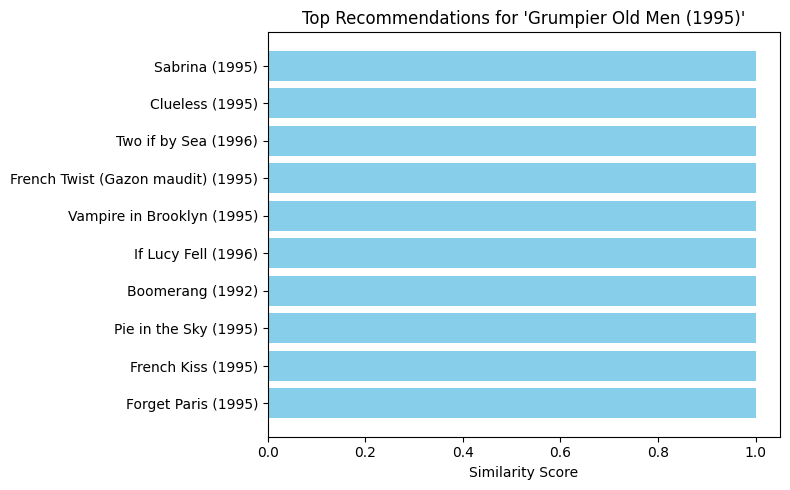

In [41]:
show_recomendations(recommended, recommendation)